# Imports

In [60]:
from __future__ import print_function
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Define device for torch
use_cuda = True
print("CUDA is available:", torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

CUDA is available: True


# Load Dataset
WELFake from HuggingFace

In [62]:
from datasets import load_dataset

dataset = load_dataset("lelexuanzz/WELFake_stylo_feats")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'has_quotes', 'has_url', 'percent_uppercase', 'frequency_punctuation', 'percent_whitespace', 'frequency_words_length_15', 'frequency_words_length_14', 'frequency_words_length_12', 'frequency_words_length_11', 'avg_sentence_length', 'has_1_to_3_urls', 'has_4_to_6_urls', 'has_more_than_6_urls', 'num_exclamations', 'num_questions', 'avg_word_length', 'lexical_diversity', 'proportion_stopwords'],
        num_rows: 70793
    })
})


In [63]:
df = dataset["train"].to_pandas()
print(df)

                                                    text  label  has_quotes  \
0      No comment is expected from Barack Obama Membe...      1           0   
1       Now, most of the demonstrators gathered last ...      1           0   
2      A dozen politically active pastors came here f...      0           0   
3      The RS-28 Sarmat missile, dubbed Satan 2, will...      1           0   
4      All we can say on this one is it s about time ...      1           0   
...                                                  ...    ...         ...   
70788  WASHINGTON (Reuters) - Hackers believed to be ...      0           0   
70789  You know, because in fantasyland Republicans n...      1           0   
70790  Migrants Refuse To Leave Train At Refugee Camp...      0           1   
70791  MEXICO CITY (Reuters) - Donald Trump’s combati...      0           0   
70792  Goldman Sachs Endorses Hillary Clinton For Pre...      1           0   

       has_url  percent_uppercase  frequency_punctu

#### Train With Original 10 features

In [64]:
from sklearn.model_selection import train_test_split

features_orig_10 = ['has_quotes', 'has_url', 'percent_uppercase', 'frequency_words_length_15', 'frequency_words_length_14', 'frequency_words_length_12', 'frequency_words_length_11', 'percent_whitespace', 'avg_sentence_length', 'frequency_punctuation']
seed = 45

y = df["label"]
x = df[features_orig_10]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

display(x_train)
display(y_train)

,has_quotes,has_url,percent_uppercase,frequency_words_length_15,frequency_words_length_14,frequency_words_length_12,frequency_words_length_11,percent_whitespace,avg_sentence_length,frequency_punctuation
33090,0,0,4.365983,0,0,3,2,16.362946,27.937500,42
13814,0,1,2.970607,1,1,3,12,16.823014,19.551724,70
47609,0,0,3.880804,0,0,2,3,16.770617,25.200000,29
30722,0,0,3.251016,0,1,4,5,16.723976,17.718750,67
1945,0,1,2.789491,0,1,3,9,16.477457,24.090909,77
...,...,...,...,...,...,...,...,...,...,...
12895,0,1,3.202995,0,1,3,8,18.219634,21.857143,61
60960,0,1,2.864939,0,0,3,6,17.189632,28.000000,32
6012,0,1,17.731959,0,0,1,0,17.113402,14.833333,11
63107,0,0,3.806452,0,1,1,2,17.161290,27.600000,30


33090    0
13814    1
47609    0
30722    0
1945     1
        ..
12895    1
60960    1
6012     1
63107    1
6558     1
Name: label, Length: 56634, dtype: int64

#### Training

In [65]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [66]:
lr_model = LogisticRegression(max_iter=1000, random_state=seed)
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=45)

In [67]:
y_pred = lr_model.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.6658662334910658


In [69]:

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,recall_score,f1_score


In [70]:
import json
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Real', 'Fake'], output_dict=True)
metrics = {"accuracy": accuracy, "classification_report": report}
# with open('./logs/lr_beforetuning_metrics.json', 'w') as f:
#     json.dump(metrics, f, indent=4)


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      7006
           1       0.65      0.75      0.69      7153

    accuracy                           0.67     14159
   macro avg       0.67      0.66      0.66     14159
weighted avg       0.67      0.67      0.66     14159



In [71]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

welfake = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics={"welfake": welfake}

Accuracy: 0.6658662334910658
Precision: 0.645657926389223
Recall: 0.7504543548161611
F1-Score: 0.6941229714876834


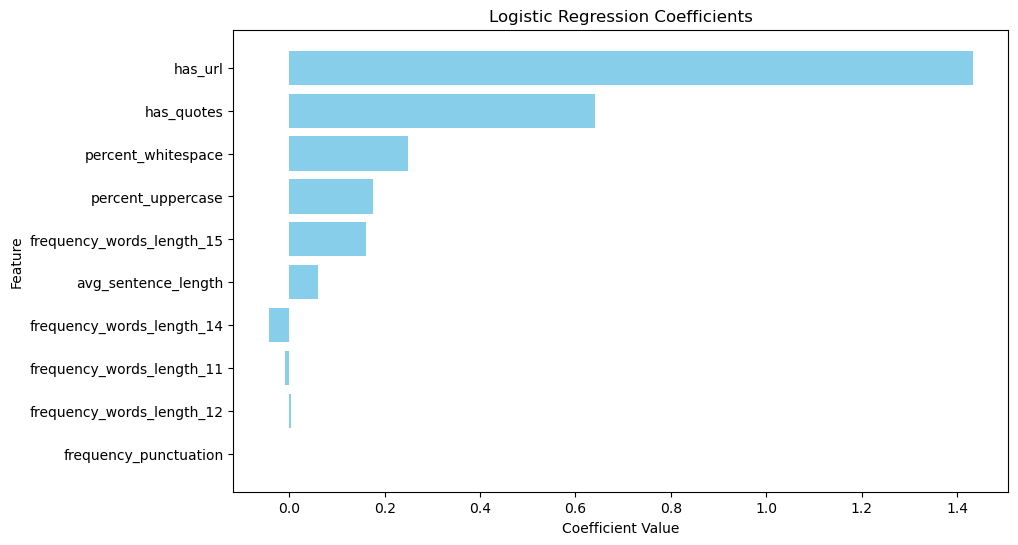

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract coefficients and feature names
coefficients = lr_model.coef_[0]
features = x_train.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [73]:
# import seaborn as sns
# # 2. Second plot: Boxplots of Top Features
# # Get top 6 features from coefficient analysis
# top_features = coef_df['Feature'].head(6).tolist()

# # Create boxplots comparing feature distributions between classes (0 vs 1)
# fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))
# for ax, feature in zip(axes.flatten(), top_features):
#     sns.boxplot(x='label', y=feature, data=df, ax=ax)
#     ax.set_title(f'Distribution of {feature}')
#     ax.set_xlabel('Fake News (1) vs Real (0)')
#     ax.set_ylabel('Feature Value')
# plt.tight_layout()
# plt.suptitle('Distribution of Top Features by News Class', y=1.02)
# plt.show()

### HyperParam Tuning

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,ConfusionMatrixDisplay

# Define the parameter grid for C
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'penalty': ['l1', 'l2'],  # Try different regularization types
    'solver': ['liblinear']  # Works well with both L1 and L2
}

# Set up GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=seed), 
                           param_grid, 
                           cv=5, 
                           scoring=['accuracy', 'precision', 'recall', 'f1'],
                           refit='f1')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters and cross-validation accuracy
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate the model with the best parameters
best_lr = grid_search.best_estimator_
y_pred_best = best_lr.predict(x_test)


Best parameters found:  {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.6892



Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.58      0.63      7006
           1       0.65      0.75      0.69      7153

    accuracy                           0.67     14159
   macro avg       0.67      0.66      0.66     14159
weighted avg       0.67      0.67      0.66     14159


Confusion Matrix:


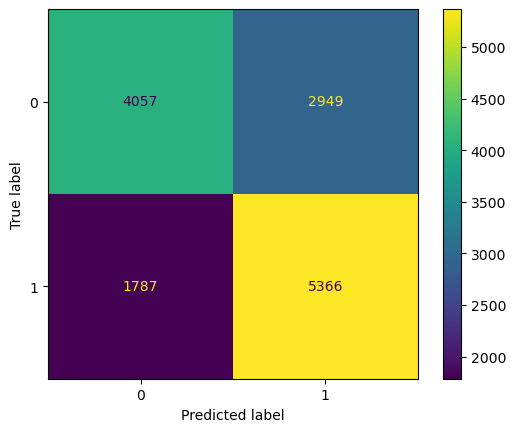

In [75]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [76]:
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1score = f1_score(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

tuning = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics["after tuing"] = tuning

Accuracy: 0.6655131012077125
Precision: 0.6453397474443776
Recall: 0.7501747518523696
F1-Score: 0.6938194983191104


### Test dataset

In [77]:
test_dataset = load_dataset("lelexuanzz/Gossipcop_Politifact_Test_Stylo")
print(test_dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'has_quotes', 'has_url', 'percent_uppercase', 'frequency_punctuation', 'percent_whitespace', 'frequency_words_length_15', 'frequency_words_length_14', 'frequency_words_length_12', 'frequency_words_length_11', 'avg_sentence_length', 'has_1_to_3_urls', 'has_4_to_6_urls', 'has_more_than_6_urls', 'num_exclamations', 'num_questions', 'avg_word_length', 'lexical_diversity', 'proportion_stopwords'],
        num_rows: 6900
    })
})


In [78]:
test_df = test_dataset["train"].to_pandas()
display(test_df)


y_test_set = test_df["label"]
x_test_set = test_df[features_orig_10]

display(x_test_set)
display(y_test_set)

,text,label,has_quotes,has_url,percent_uppercase,frequency_punctuation,percent_whitespace,frequency_words_length_15,frequency_words_length_14,frequency_words_length_12,frequency_words_length_11,avg_sentence_length,has_1_to_3_urls,has_4_to_6_urls,has_more_than_6_urls,num_exclamations,num_questions,avg_word_length,lexical_diversity,proportion_stopwords
0,The media reported on “5 TikTok dances you can...,0,1,0,5.102041,32,17.040816,0,1,0,3,14.916667,0,0,0,0,2,4.482558,0.651163,0.401163
1,"""Over 240,000 'unverified' ballots have alread...",0,1,0,3.068897,181,15.636029,4,6,26,10,18.271186,0,0,0,2,0,5.078619,0.390221,0.423778
2,"Says ""Ron Johnson is making excuses for rioter...",1,1,1,3.742204,224,16.468666,0,3,12,7,16.619718,0,0,1,3,2,4.761525,0.428191,0.425532
3,“We have seen over the last 10 years ... under...,0,1,1,3.492849,107,16.529153,0,2,3,7,16.410256,0,1,0,0,0,4.758564,0.409462,0.419250
4,“I don’t get involved in the hiring and firing...,0,1,0,3.040541,139,16.394026,3,10,1,16,19.816327,0,0,0,0,0,4.737173,0.387435,0.409424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6895,Wedding Album: Dancing with the Stars Pro Lind...,0,0,0,7.645260,5,18.042813,0,0,0,1,20.666667,0,0,0,1,0,4.283333,0.816667,0.483333
6896,WATCH: Sneak Peek: Arizona's Furious Alex Atta...,0,0,0,9.923664,25,16.793893,0,0,0,0,23.000000,0,0,0,1,0,4.216495,0.690722,0.371134
6897,Mary Kay Letourneau 'Hopeful' She Can Fix Marr...,0,0,0,3.754171,94,15.656285,0,1,5,1,16.216216,0,0,0,0,1,4.602585,0.500808,0.462036
6898,Charlize Theron still upset Aeon Flux didn’t w...,0,0,0,3.329065,36,17.669654,0,0,0,1,18.250000,0,0,0,0,0,4.104730,0.577703,0.483108


,has_quotes,has_url,percent_uppercase,frequency_words_length_15,frequency_words_length_14,frequency_words_length_12,frequency_words_length_11,percent_whitespace,avg_sentence_length,frequency_punctuation
0,1,0,5.102041,0,1,0,3,17.040816,14.916667,32
1,1,0,3.068897,4,6,26,10,15.636029,18.271186,181
2,1,1,3.742204,0,3,12,7,16.468666,16.619718,224
3,1,1,3.492849,0,2,3,7,16.529153,16.410256,107
4,1,0,3.040541,3,10,1,16,16.394026,19.816327,139
...,...,...,...,...,...,...,...,...,...,...
6895,0,0,7.645260,0,0,0,1,18.042813,20.666667,5
6896,0,0,9.923664,0,0,0,0,16.793893,23.000000,25
6897,0,0,3.754171,0,1,5,1,15.656285,16.216216,94
6898,0,0,3.329065,0,0,0,1,17.669654,18.250000,36


0       0
1       0
2       1
3       0
4       0
       ..
6895    0
6896    0
6897    0
6898    0
6899    0
Name: label, Length: 6900, dtype: int64

In [79]:
y_test_pred = best_lr.predict(x_test_set)

In [80]:
accuracy = accuracy_score(y_test_set, y_test_pred)
precision = precision_score(y_test_set, y_test_pred)
recall = recall_score(y_test_set, y_test_pred)
f1score = f1_score(y_test_set, y_test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1score)

tuning = {"Accuracy:":accuracy,"Precision:":precision,"Recall:":recall,"F1-Score:": f1score}
metrics["test dataset"] = tuning

Accuracy: 0.5114492753623189
Precision: 0.3915222384631447
Recall: 0.8040308747855918
F1-Score: 0.5266114309787951


In [81]:
import pickle

pickle.dump(best_lr, open("models/iter1_lr_model", 'wb'))
print("Model saved as iter1_lr_model")

Model saved as iter1_lr_model


In [82]:
import json
# Store all results
with open('./results/iter1_lrmetrics.json', 'w') as f:
     json.dump(metrics, f, indent=4)

In [83]:
#test to see if model can be loaded

loaded_model = pickle.load(open('models/iter1_lr_model', 'rb'))

load_predict = loaded_model.predict(x_test_set)

accuracy = accuracy_score(y_test_set, load_predict)
precision = precision_score(y_test_set, load_predict)
recall = recall_score(y_test_set, load_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.5114492753623189
Precision: 0.3915222384631447
Recall: 0.8040308747855918
